In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

In [4]:
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True 
config.log_device_placement = True 
sess = tf.compat.v1.Session(config=config)
set_session(sess)

%matplotlib inline

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GRID A100D-16C, pci bus id: 0000:02:01.0, compute capability: 8.0



2023-06-02 05:41:21.749425: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 05:41:21.749653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 05:41:21.749755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 05:41:21.749909: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 05:41:21.750008: I tensorflow/compiler/xla/stream_executo

In [7]:
my_data_dir = 'dataset/cell_images'

In [8]:
os.listdir(my_data_dir)

['train', 'test']

In [9]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [10]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [11]:
len(os.listdir(train_path+'/uninfected/'))

12480

In [12]:
len(os.listdir(train_path+'/parasitized/'))

12480

In [13]:
os.listdir(train_path+'/parasitized')[100]

'C116P77ThinF_IMG_20150930_171635_cell_112.png'

In [14]:
para_img= imread(train_path+
                 '/parasitized/'+
                 os.listdir(train_path+'/parasitized')[100])

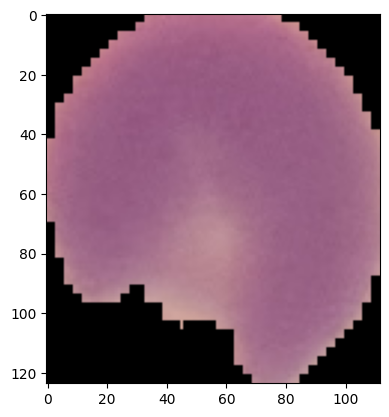

In [15]:
plt.imshow(para_img)

In [16]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

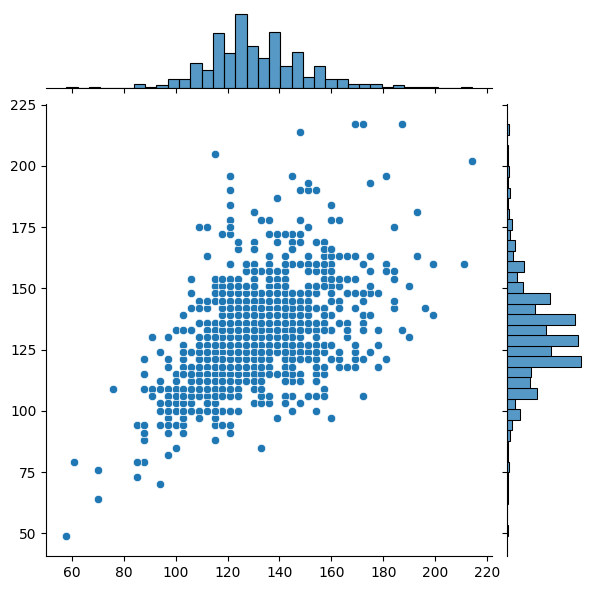

In [17]:
sns.jointplot(x=dim1,y=dim2)

In [18]:
image_shape = (130,130,3)

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Flatten())


model.add(layers.Dense(128))
model.add(layers.Activation('relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2023-06-02 05:45:32.623412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 05:45:32.623683: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 05:45:32.623796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 05:45:32.624257: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 05:45:32.624378: I tensorflow/compiler/xla/stream_executo

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [21]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

In [22]:
batch_size = 16

In [23]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [24]:
len(train_image_gen.classes)

24958

In [25]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [26]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [27]:
results = model.fit(train_image_gen,epochs=4,
                              validation_data=test_image_gen
                             )

Epoch 1/4


2023-06-02 05:48:06.946516: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8801
2023-06-02 05:48:07.201285: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:648] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-02 05:48:07.248254: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f0839410540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-02 05:48:07.248296: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): GRID A100D-16C, Compute Capability 8.0
2023-06-02 05:48:07.253791: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-02 05:48:07.394612: I tensorflow/compiler/jit/xla_compilation_cache.cc:480] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proce

1560/1560 [==============================] - 127s 80ms/step - loss: 0.4901 - accuracy: 0.7491 - val_loss: 0.2098 - val_accuracy: 0.9223
Epoch 2/4
1560/1560 [==============================] - 125s 80ms/step - loss: 0.1898 - accuracy: 0.9413 - val_loss: 0.1822 - val_accuracy: 0.9400
Epoch 3/4
1560/1560 [==============================] - 133s 85ms/step - loss: 0.1723 - accuracy: 0.9474 - val_loss: 0.1670 - val_accuracy: 0.9442
Epoch 4/4
1560/1560 [==============================] - 124s 79ms/step - loss: 0.1634 - accuracy: 0.9479 - val_loss: 0.1644 - val_accuracy: 0.9454


In [28]:
losses = pd.DataFrame(model.history.history)

<Axes: >

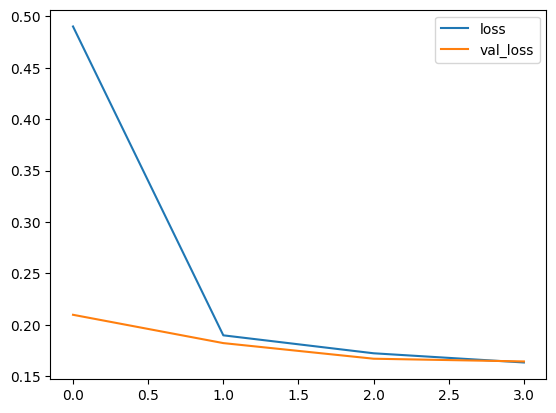

In [29]:
losses[['loss','val_loss']].plot()

In [30]:
model.evaluate(test_image_gen)

163/163 [==============================] - 12s 70ms/step - loss: 0.1552 - accuracy: 0.9477


[0.1551879346370697, 0.947692334651947]

In [31]:
pred_probabilities = model.predict(test_image_gen)

163/163 [==============================] - 12s 71ms/step


In [32]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [33]:
predictions = pred_probabilities > 0.5

In [34]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1300
           1       0.92      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [35]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1196,  104],
       [  38, 1262]])

1/1 [==============================] - 0s 112ms/step


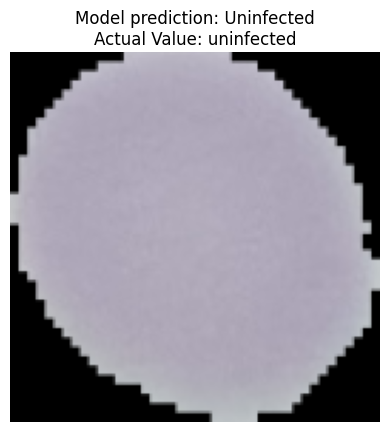

In [36]:
import random
import tensorflow as tf
list_dir=["uninfected","parasitized"]
dir_=(random.choice(list_dir))
para_img= imread(train_path+
                 '/'+dir_+'/'+
                 os.listdir(train_path+'/'+dir_)[random.randint(0,100)])
img  = tf.convert_to_tensor(np.asarray(para_img))
img = tf.image.resize(img,(130,130))
img=img.numpy()
pred=bool(model.predict(img.reshape(1,130,130,3))<0.5 )
plt.title("Model prediction: "+("Parasitized" if pred  else "Uninfected")+"\nActual Value: "+str(dir_))
plt.axis("off")
plt.imshow(img)
plt.show()